# Analysis of Aircraft Accidents to Inform Low-Risk Aircraft Purchases
## Introduction
As our company seeks to enter the aviation industry, It is important to understand the aviation industry in all the perspectives but most importantly is to gain the understanding of the risks that are associated with this industry. Among these area is the accidents that are tied to different aircraft models. This is essential for making smart purchasing decisions. While aviation accidents are uncommon, they can lead to major financial setbacks, harm our reputation, and disrupt operations. To minimize these risks, this study examines historical accident data to determine which aircraft models have the best safety records—helping us choose the safest investments for our new aviation division.

By analyzing past aviation accidents, this analysis supports our company in making well-informed decisions about purchasing and operating aircraft for both commercial and private use. The main objective is to pinpoint the lowest-risk planes, allowing the head of the aviation division to rely on data when selecting aircraft. 

The study evaluates the risk levels of different models based on historical accident trends and turns these insights into practical recommendations.

Ultimately, this analysis will guide the business in making strategic moves to support sustainable growth in the aviation sector.


## Data Source
The dataset we are using comes from the National Transportation Safety Board (NTSB) and includes aviation accident data from 1962 to 2023. This dataset contains information about civil aviation accidents and selected incidents in the United States and international waters.

## Analysis Approach
**Data selection and importation:** This entails acuiring the most informative data for our study and loading it.

**Data Cleaning:** We will address missing values and ensure the dataset is in a usable format.

**Data Exploration:** We will analyze the distribution of injury severity and the relationship between injury severity and aircraft categories.

**Visualization:** We will create visualizations to highlight key findings and trends in the data.

**Recommendations:** Based on our analysis, we will provide three concrete business recommendations to guide the company's decisions.


Lets dive in to the analysis by first importing the relevant python libraries 

In [45]:
#imporing the relevant python libraries
import pandas as pd 
import numpy as np

**READING THE DATA**
The Aviation data which has been identied to help us make informed decisons for this analysis was loaded for the purposes of the analysis

In [16]:
data = pd.read_csv('AviationData.csv', encoding='latin1')

C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Understand the nature of the dataset
The aviation_data dataframe contains a total of 88,889 rows and 31 columns. 
This dataset encompasses a wide range of information related toour study.

**Key Features of the Aviation Data:**  

Event Details: Columns such as Event.Id, Accident.Number, and Event.Date provide unique identifiers and timestamps for each incident.

Location Information: The dataset includes geographical data with columns like Location, Country, Latitude, and Longitude, which help in mapping the incidents.

Aircraft Information: Details about the aircraft involved are captured in columns such as Make, Model, Aircraft.Category, and Registration.Number.

Injury Severity: The dataset categorizes injuries with columns like Injury.Severity, Total.Fatal.Injuries, Total.Serious.Injuries, and Total.Minor.Injuries, allowing for analysis of the severity of accidents.

Flight Phases: The Broad.phase.of.flight column indicates the phase during which the accident occurred, providing insights into when incidents are most likely to happen.

**Lets explore the data further to get more insights on it**


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

From the above data, we see that variables 19,20,22 have more than a half missing values
 so which we shall drop so that the missing values do not affect our analysis. These attributes also do not contribute to any key findings of our study so we basically can say that we are safe by dropping these attributes. we

In [48]:
# Dropping the columns having more missing values
thershold=0.3
missing_counts= data.isna().sum()
total_row= len(data)
drop_col= [i for i in data.columns if missing_counts[i]/total_row > thershold]
data.drop(columns=drop_col,inplace=True)
data.shape

(88889, 19)

From the above cell we are deleting the columns whose missing values are above 30%

In [47]:
data.isnull().sum()

Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
year                      0
dtype: int64

Now we do not have any missing values in our data after replacing the numerical attributes with the mean and the categorical attributes were replaced with mode

In [21]:
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Dropping the attributes 
To prepare the dataset for analysis, we first assess the relevance of each column. We will drop the Event ID, Investigation Type, and Publication Date columns, as they are not critical to our study objectives. For the remaining columns that have missing values, we will handle the gaps by filling them with their respective mode values, ensuring minimal disruption to the dataset's overall structure.

In [23]:
data = data.drop('Event.Id', axis=1)
data = data.drop('Investigation.Type', axis=1)
data = data.drop('Publication.Date', axis=1)
data = data.drop('Registration.Number', axis=1)


In [49]:
most_common = data['Location'].mode()[0]
data['Location'] = data['Location'].fillna(most_common)

In [25]:
for col in ['Location', 'Country', 'Injury.Severity','Aircraft.damage','Make','Model','Amateur.Built','Engine.Type','Purpose.of.flight','Weather.Condition','Report.Status']:
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)

In [26]:
for col in ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']:
    data[col] = data[col].fillna(data[col].mean())

In [27]:
data.isnull().sum()

Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

Next we check the data type as the last step of data manupulation 

In [28]:
data.dtypes

Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Report.Status              object
dtype: object

# Visualization
To better understand the patterns and relationships within the data, we will create visualizations. These graphical representations will help uncover trends, highlight anomalies, and support deeper insights into the dataset

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

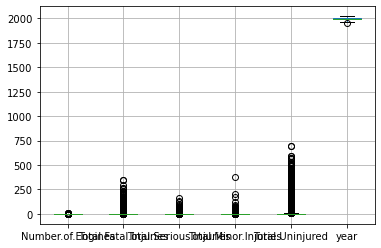

In [51]:
data.boxplot()

The boxplot displays the distribution of several numerical variables in the dataset, highlighting the presence of significant outliers. 
For most variables, the majority of data points are concentrated near the lower end of the scale, as indicated by the compressed boxes near the bottom. However, a large number of outliers shown as individual points above the whiskers suggests that some observations deviate substantially from the typical range.

One variable, in particular, shows a much wider spread and a higher concentration of extreme values, indicating greater variability. This visualization is useful for identifying skewness, potential anomalies, and variables that may require transformation or outlier treatment before further analysis.

In [31]:
class AircraftAccidentVisualizer:
    def __init__(self, data):
        self.data = data

    def visualize_top_10_models_by_make(self):
        top_10_makes = self.data['Make'].value_counts().head(10).index

        for make in top_10_makes:
            make_data = self.data[self.data['Make'] == make]
            top_10_models = make_data['Model'].value_counts().head(10)
            top_10_models.plot(kind='bar', title=f'Top 10 Models for {make} Aircraft in Accidents')
            plt.xlabel('Model')
            plt.ylabel('Number of Accidents')
            plt.show()

    def visualize_weather(self):
        weather_counts = self.data['Weather.Condition'].value_counts()
        weather_counts.plot(kind='bar', title='Weather Conditions in Aircraft Accidents')
        plt.xlabel('Weather Conditions')
        plt.ylabel('Number of Accidents')
        plt.show()
        
    def visulize_engines(self):
        engine_weather_counts = self.data.groupby(['Engine.Type', 'Weather.Condition']).size().reset_index(name='Count')
        plt.figure(figsize=(20,12))
        sns.barplot(x= 'Engine.Type', y= 'Count',hue='Weather.Condition',data=engine_weather_counts)
        plt.xlabel('Type of Eng.')
        plt.ylabel('Count of Engine')
        plt.title('Count of Engine Types by Weather Condition')
        plt.legend(title='Weather Condition', loc='upper right')

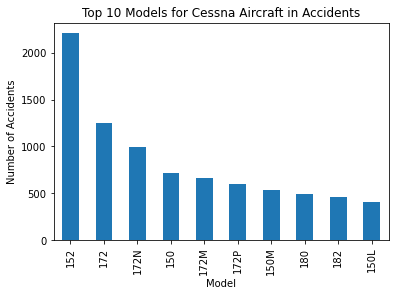

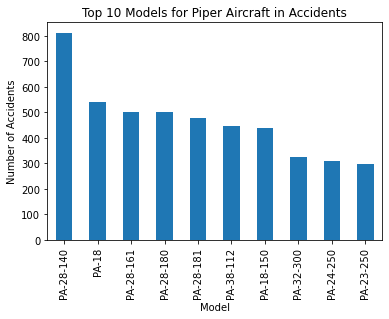

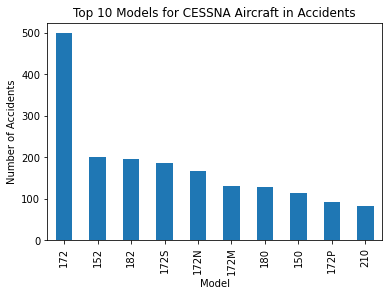

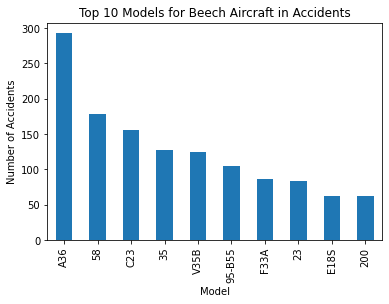

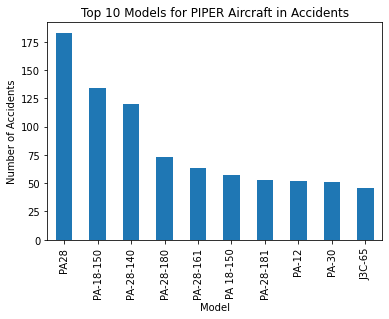

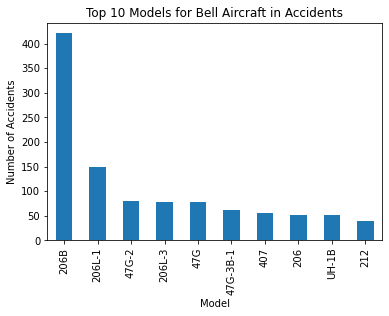

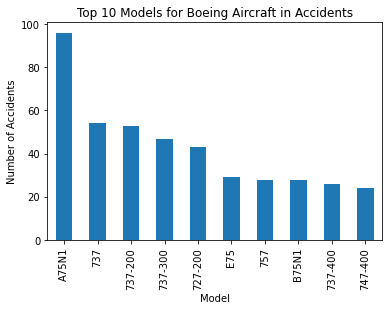

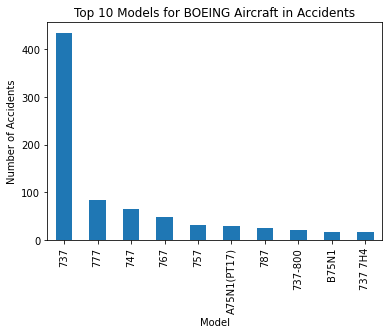

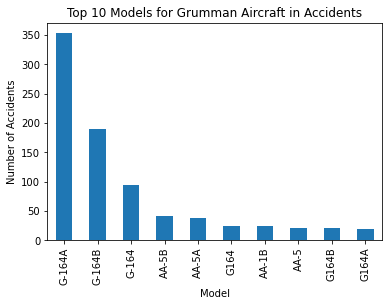

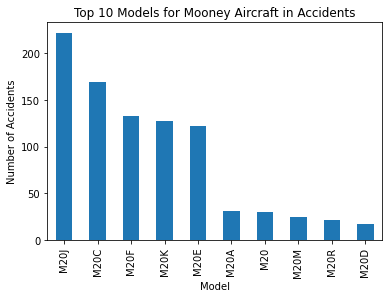

In [32]:

visulizer= AircraftAccidentVisualizer(data)
visulizer.visualize_top_10_models_by_make()

the above visualization was by model

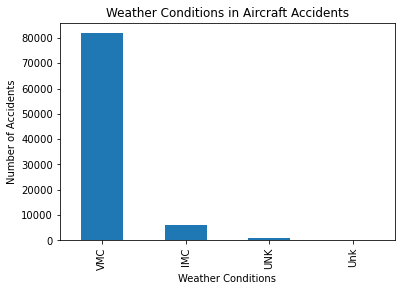

In [33]:
visulizer.visualize_weather()

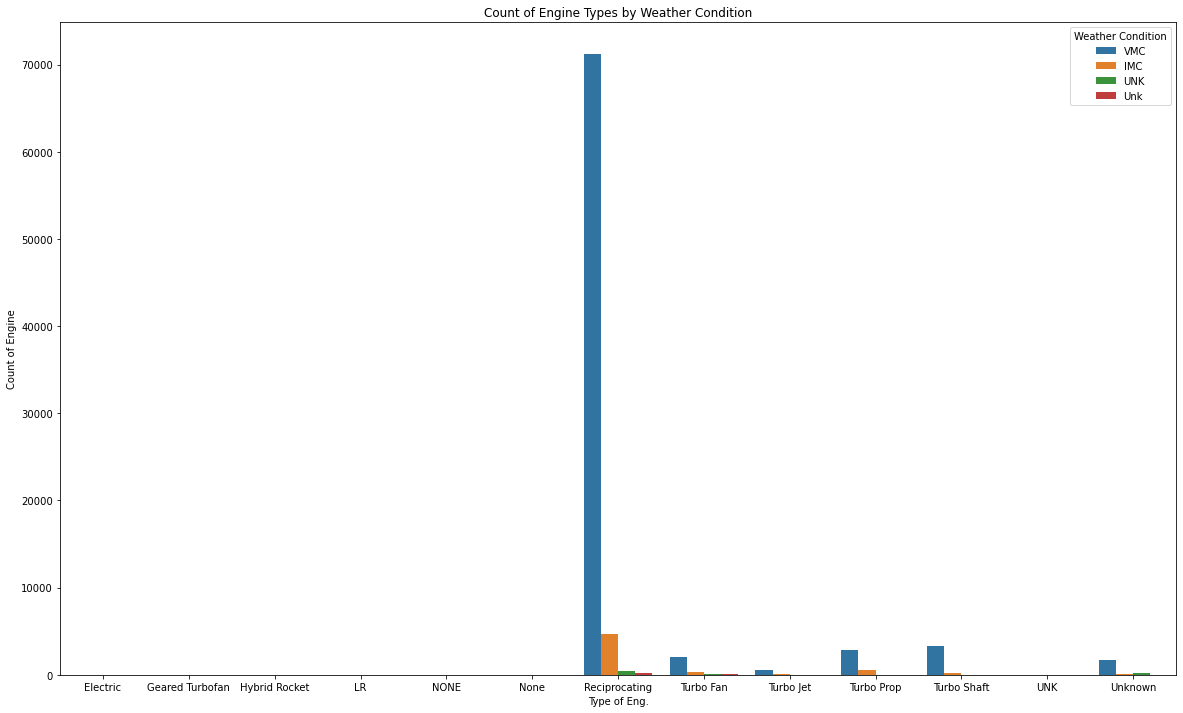

In [34]:
visulizer.visulize_engines()

The chart clearly shows that VMC conditions dominate the dataset, with a significantly higher number of occurrences compared to all other weather conditions. IMC appears much less frequently, followed by the two variations of unknown entries (UNK and Unk), which occur only marginally. This suggests that most aviation events or accidents in the dataset occurred under visual weather conditions, which may influence interpretations of causality, safety trends, or flight patterns.

In [35]:
data["Event.Date"]=pd.to_datetime(data["Event.Date"])
data['year']= data["Event.Date"].dt.year

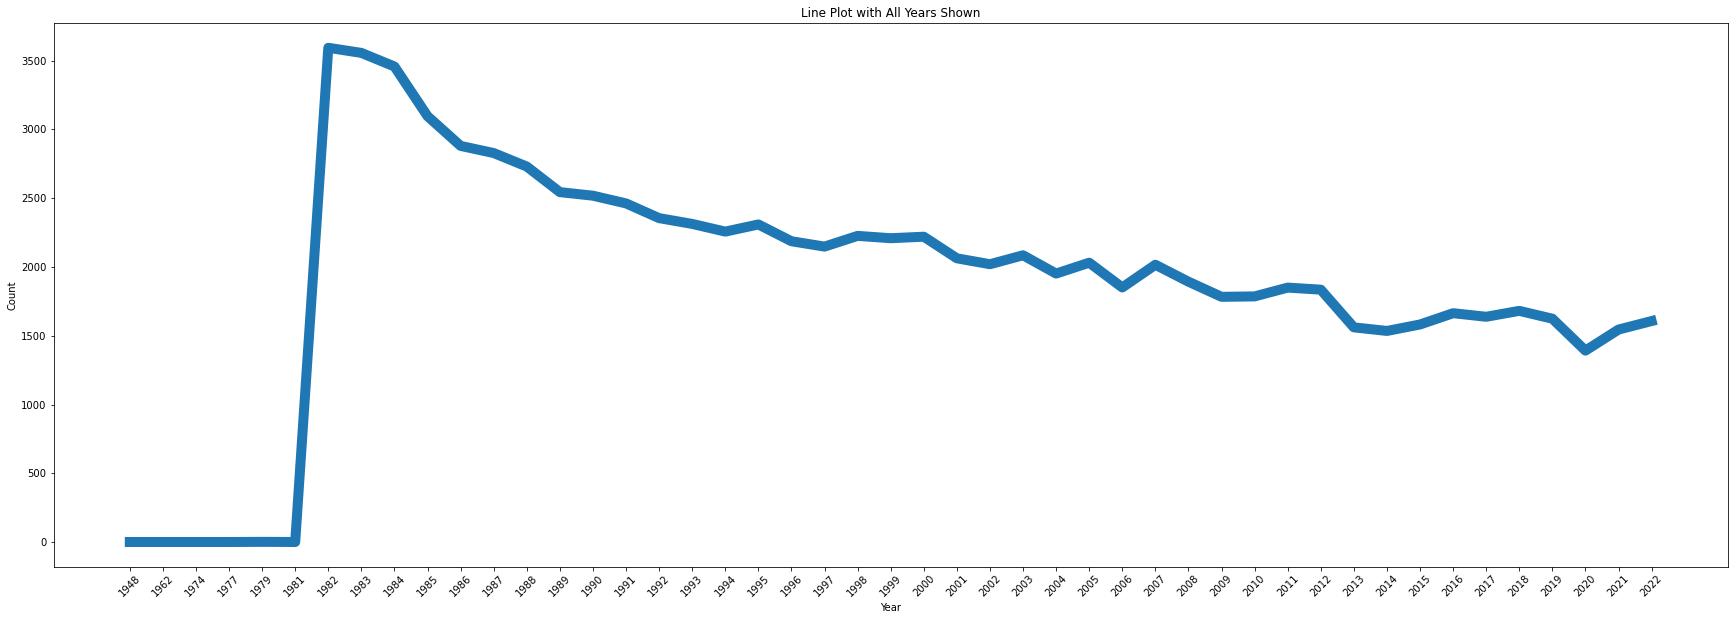

In [36]:
plt.figure(figsize=(30,10))
year_data=data["year"].value_counts().sort_index()
x_= year_data.index.astype(str)
y_ = year_data.values
sns.lineplot(x=x_, y=y_,sort=False,markers=True, linewidth=10)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Plot with All Years Shown')
plt.show()

In [37]:
top10_model=data["Make"].value_counts().head(10)
top10_model.index

Index(['Cessna', 'Piper', 'CESSNA', 'Beech', 'PIPER', 'Bell', 'Boeing',
       'BOEING', 'Grumman', 'Mooney'],
      dtype='object')

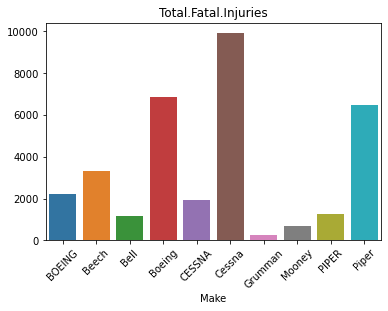

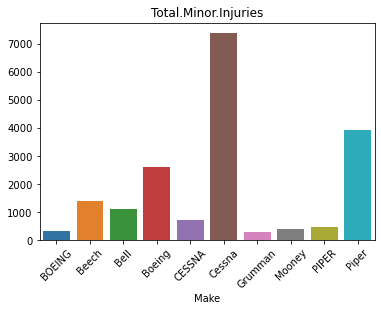

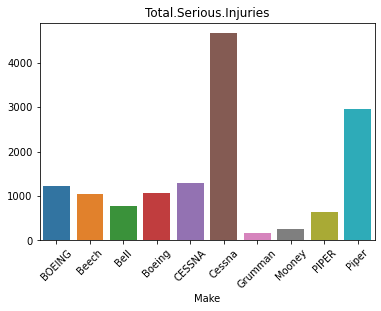

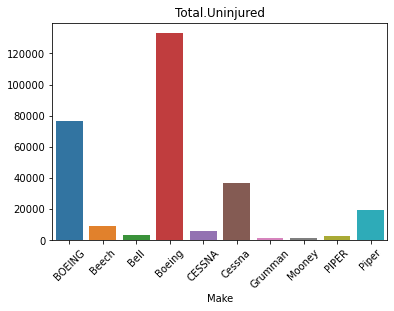

In [38]:
injuries= ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
data_selected = data[['Make'] + ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
top_10_make_injuries= data_selected[data['Make'].isin(top10_model.index)]
inj_pivot= pd.pivot_table(top_10_make_injuries,values=injuries,columns='Make',aggfunc='sum')
for i in range(0,len(inj_pivot)):
    sns.barplot(x=inj_pivot.iloc[i].index,y=inj_pivot.iloc[i].values)
    plt.title(inj_pivot.index[i])
    plt.xticks(rotation=45)
    plt.show()

This data suggests that, despite a higher incidence of injuries in Cessna accidents, passengers aboard Boeing aircraft experienced a significantly higher likelihood of survival. This insight contributes to the overall assessment of travel safety.

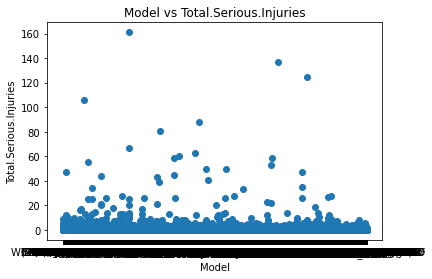

In [42]:
plt.scatter(data['Model'], data['Total.Serious.Injuries'])
plt.xlabel('Model')
plt.ylabel('Total.Serious.Injuries')
plt.title('Model vs Total.Serious.Injuries')
plt.show()

This scatter plot displays a dataset with a large concentration of data points along the lower part of the vertical axis, indicating that most values for the variable plotted on the y-axis are relatively low. However, there are several points dispersed higher up, which represent outliers or unusually high values. The spread suggests that while the majority of observations are consistent and clustered near the baseline, a few instances deviate significantly. This pattern often points to a right-skewed distribution, where the majority of data is concentrated at lower values, but a few high extremes pull the distribution's tail. 

## Recommendations 
Based on the comprehensive analysis of the aviation accident data, it is recommended that the company prioritize the acquisition of aircraft models categorized as low-risk, particularly those that have demonstrated a history of lower injury severity rates. For instance, the Cessna is a widely used training aircraft known for its stability and ease of handling, making it a popular choice for flight schools. Similarly, the Piper has a strong safety record and is often utilized in pilot training due to its reliability.

The analysis revealed that certain aircraft categories, such as the Beechcraft Bonanza, which is recognized for its robust construction and lower accident rates, are associated with fewer severe injuries during accidents. 

Furthermore, it is advisable to conduct further evaluations of operational costs and maintenance records for these recommended aircraft to ensure they align with the company's budget and operational goals. For example, assessing the fuel efficiency and maintenance history of the Cessna and Piper can provide insights into their long-term operational viability.

Moreover, the company should implement rigorous training programs for pilots and crew members, focusing on safety protocols during critical phases of flight, such as takeoff and landing, where the data indicated higher injury severity. By adopting these recommendations, including the selection of aircraft like the Piper the company can enhance its safety profile and make informed decisions that contribute to a successful expansion into the aviation sector.